# Explainable Boosting Machine

## Set Up

In [1]:
# load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show
import seaborn as sns

# set visualization default
sns.set_theme()

# load data
raw_df = pd.read_csv('../../data/raw/rawdata_new.csv')

# create copy of raw data
processed_df = raw_df.copy()

## Data Prep

In [2]:
# calculate proportion of applicable measures implemented
implemented_cols = ['legum', 'conc', 'add', 'lact', 'breed', 'covman', 'comp', 'drag', 'cov', 'plough', 'solar', 'biog', 'ecodr']
processed_df['num_implemented'] = (processed_df[implemented_cols] == 1).sum(axis=1)
processed_df['num_applicable'] = (processed_df[implemented_cols] != 3).sum(axis=1)
processed_df['prop_implemented'] = processed_df['num_implemented'] / processed_df['num_applicable']

In [3]:
# drop columns with NA, not supported by EBM
processed_df.dropna(axis=1, inplace=True)

In [4]:
# drop columns with NA, not supported by EBM
processed_df.dropna(axis=1, inplace=True)
# create list of columns to keep
keep_cols = processed_df.columns.to_list()
print(keep_cols)

['id', 'date', 'trees', 'arable_land', 'ley', 'perm_grass', 'perm_crops', 'prot_cult', 'add_agr_land', 'oth_land', 'qual_landscape', 'spec_crops', 'grapes', 'vegetables', 'fruits', 'oth_spec_crops', 'animal_unit', 'cattle_animal_unit', 'dairy_cows', 'suckler_cows', 'hor_shee_goa', 'pigs_poultry', 'pigs', 'poultry', 'region', 'educ', 'cons_general', 'percep_hail', 'percep_drought', 'percep_frost', 'percep_heavyrain', 'percep_longrain', 'percep_heat', 'cons_farm', 'self_reduc', 'self_act', 'self_cap', 'self_conf', 'self_not', 'legum', 'conc', 'add', 'lact', 'breed', 'covman', 'comp', 'drag', 'cov', 'plough', 'solar', 'biog', 'ecodr', 'activ_dairy', 'activ_cattle', 'activ_pig', 'activ_poultry', 'activ_arab', 'activ_special', 'activ_nonag', 'attain_ghg', 'attain_yield', 'attain_biodiv', 'attain_soil', 'attain_incom', 'attain_acknow', 'innov_pion', 'innov_early', 'innov_thorou', 'innov_others', 'innov_trad', 'satisf_ldw', 'thresh_ldw', 'satisf_total', 'thresh_total', 'share', 'others_opinio

In [5]:
# remove irrelevant features from predictors
# TODO need to think about what to keep and what to not

# drop columns with NA, not supported by EBM
processed_df.dropna(axis=1, inplace=True)
# create list of columns to keep
X_cols = processed_df.columns.to_list()
# drop id
X_cols.remove('id')
# drop meitigations
mitigation_cols = ['legum', 'conc', 'add', 'lact', 'breed', 'covman', 'comp', 'drag', 'cov', 'plough', 'solar', 'biog', 'ecodr', 'num_implemented', 'num_applicable', 'prop_implemented']
for c in mitigation_cols:
    X_cols.remove(c)

In [6]:
# sample 90% of data to play around with model
# TODO need to think about how to test/train/validate split

df = processed_df.sample(frac=0.9)
X = df[X_cols]
y = df['prop_implemented']

seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

In [7]:
ebm = ExplainableBoostingRegressor(random_state=seed)
ebm.fit(X_train, y_train)

ExplainableBoostingRegressor(feature_names=['date', 'trees', 'arable_land',
                                            'ley', 'perm_grass', 'perm_crops',
                                            'prot_cult', 'add_agr_land',
                                            'oth_land', 'qual_landscape',
                                            'spec_crops', 'grapes',
                                            'vegetables', 'fruits',
                                            'oth_spec_crops', 'animal_unit',
                                            'cattle_animal_unit', 'dairy_cows',
                                            'suckler_cows', 'hor_shee_goa',
                                            'pigs_poultry', 'pigs', 'poultry',
                                            'region', 'educ', 'co...
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                     

In [8]:
ebm_global = ebm.explain_global()
show(ebm_global)

/opt/anaconda3/lib/python3.7/site-packages/interpret/visual/udash.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/opt/anaconda3/lib/python3.7/site-packages/interpret/visual/udash.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/opt/anaconda3/lib/python3.7/site-packages/interpret/visual/udash.py:7: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table as dt


<!-- http://127.0.0.1:7001/140616963143504/ -->

In [10]:
ebm_local = ebm.explain_local(X_test[:5], y_test[:5])
show(ebm_local)

<!-- http://127.0.0.1:7001/140617006528976/ -->

<AxesSubplot:xlabel='actual', ylabel='predictions'>

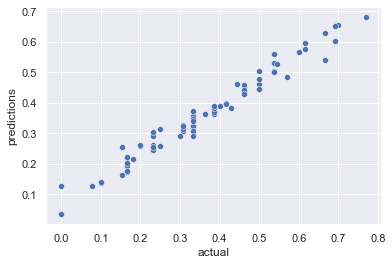

In [15]:
# plot predictions vs. actual for training set
sns.scatterplot(
    data=pd.DataFrame({'actual':y_train, 'predictions':ebm.predict(X_train)}),
    x='actual',
    y='predictions')

In [20]:
r2_score(y_train, ebm.predict(X_train))

0.9382782479866654

<AxesSubplot:xlabel='actual', ylabel='predictions'>

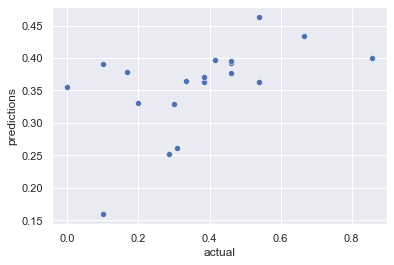

In [16]:
# plot predictions vs. actual for test set
sns.scatterplot(
    data=pd.DataFrame({'actual':y_test, 'predictions':ebm.predict(X_test)}),
    x='actual',
    y='predictions')

In [19]:
from sklearn.metrics import r2_score

r2_score(y_test, ebm.predict(X_test))

0.23266657229584975